# Random Forest Project 
Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Import Libraries and Dataset

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
loan_df = pd.read_csv("loan_data.csv")

In [66]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [67]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [68]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## EDA

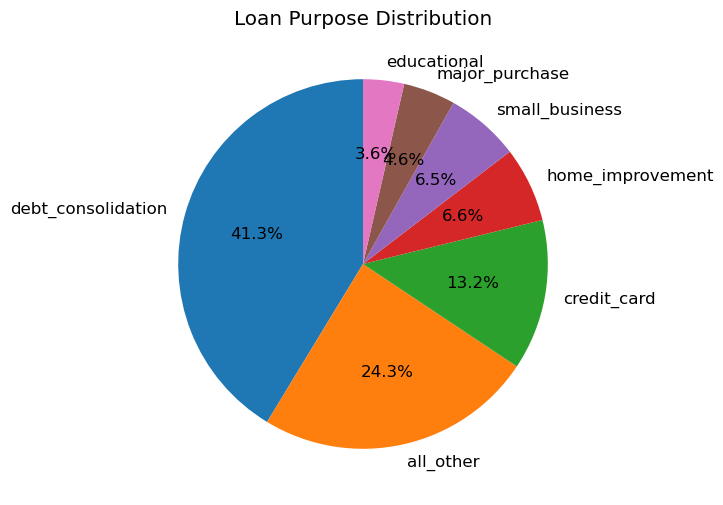

In [69]:
purpose_counts = loan_df['purpose'].value_counts()
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Loan Purpose Distribution")
plt.show()

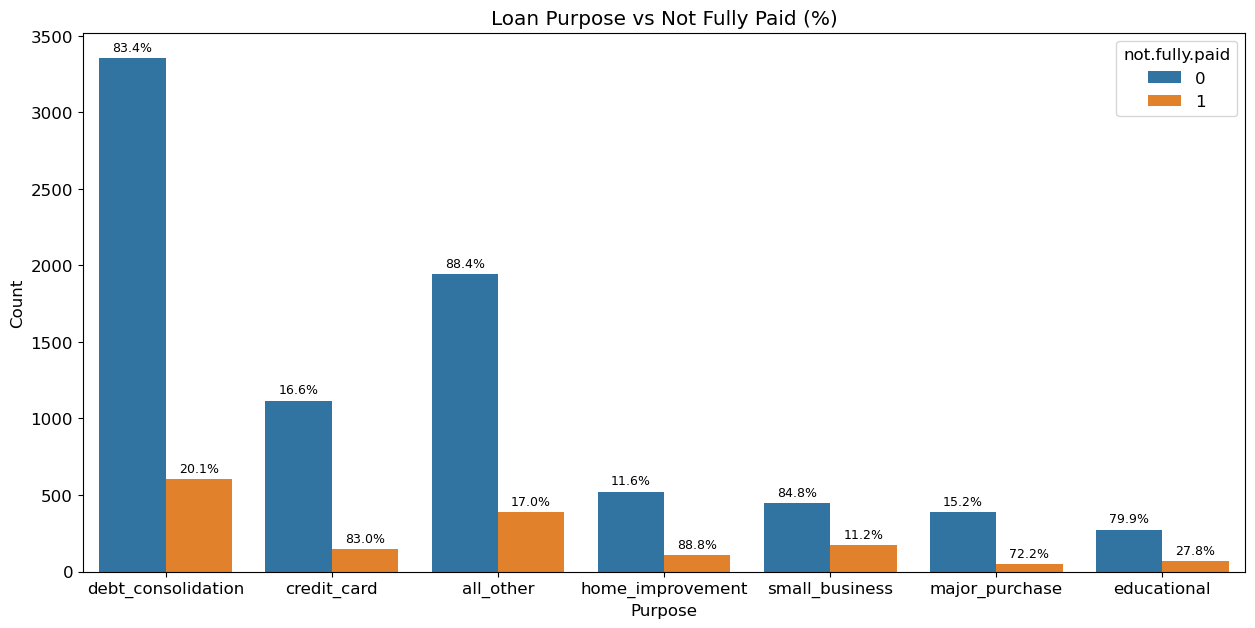

In [70]:
# Calculate group percentages
group_counts = loan_df.groupby(['purpose','not.fully.paid']).size().reset_index(name='count')
group_totals = loan_df.groupby('purpose')['not.fully.paid'].count().reset_index(name='total')
df_perc = group_counts.merge(group_totals, on='purpose')
df_perc['perc'] = df_perc['count'] / df_perc['total'] * 100

# Plot
plt.figure(figsize=(15,7))
ax = sns.countplot(x='purpose', hue='not.fully.paid', data=loan_df)

# Annotate percentages on each bar
for p, perc in zip(ax.patches, df_perc['perc']):
    ax.annotate(f'{perc:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0,3), 
                textcoords='offset points')

plt.title("Loan Purpose vs Not Fully Paid (%)")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.show()


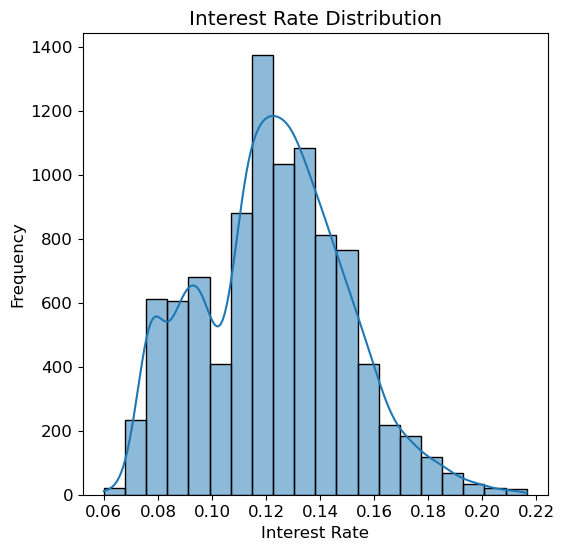

In [71]:
plt.figure(figsize=(6,6))
sns.histplot(loan_df['int.rate'], bins=20, kde=True)  
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Interest Rate Distribution")
plt.show()

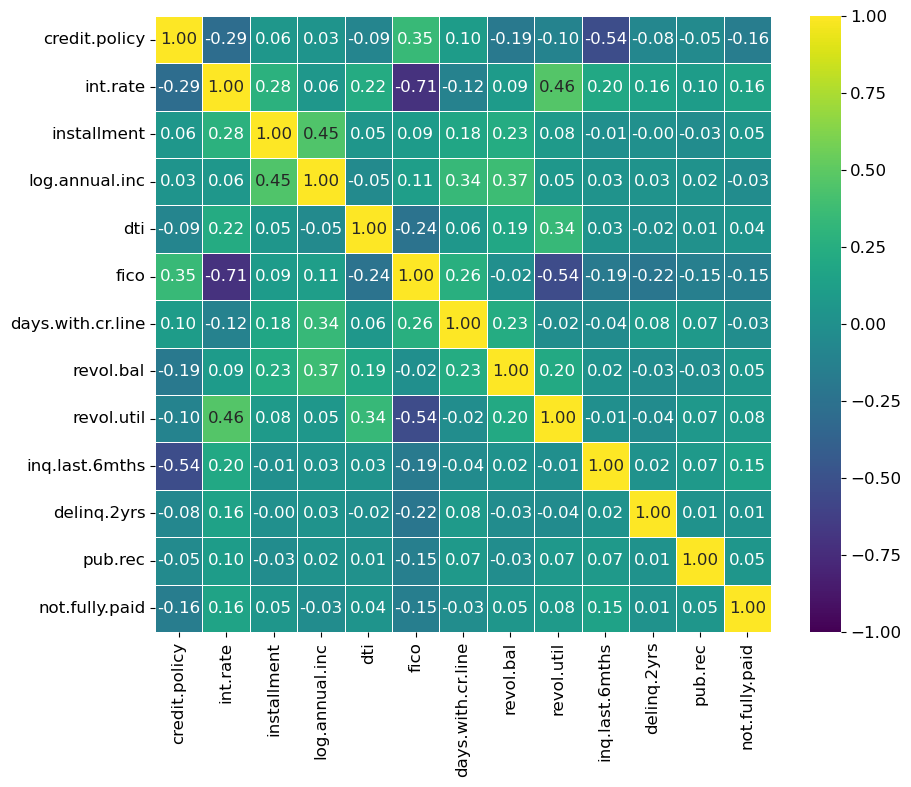

In [72]:
correlation_matrix = loan_df.select_dtypes(include=[np.number]).corr()

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

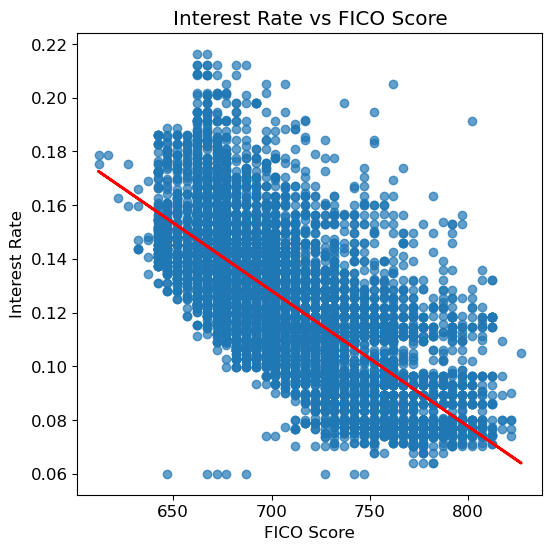

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(loan_df['fico'], loan_df['int.rate'], alpha=0.7)

# Fit regression line
m, b = np.polyfit(loan_df['fico'], loan_df['int.rate'], 1)  # slope & intercept
plt.plot(loan_df['fico'], m*loan_df['fico'] + b, color='red', linewidth=2)

plt.xlabel("FICO Score")
plt.ylabel("Interest Rate")
plt.title("Interest Rate vs FICO Score")
plt.show()

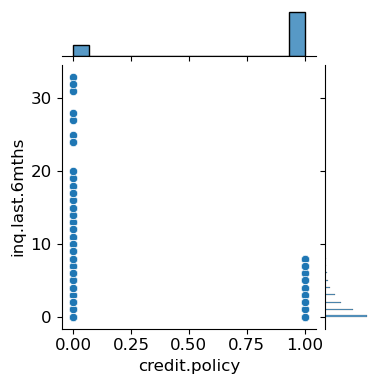

In [74]:
sns.jointplot(loan_df, x='credit.policy', y='inq.last.6mths', height=4)
plt.show()

<Figure size 1100x700 with 0 Axes>

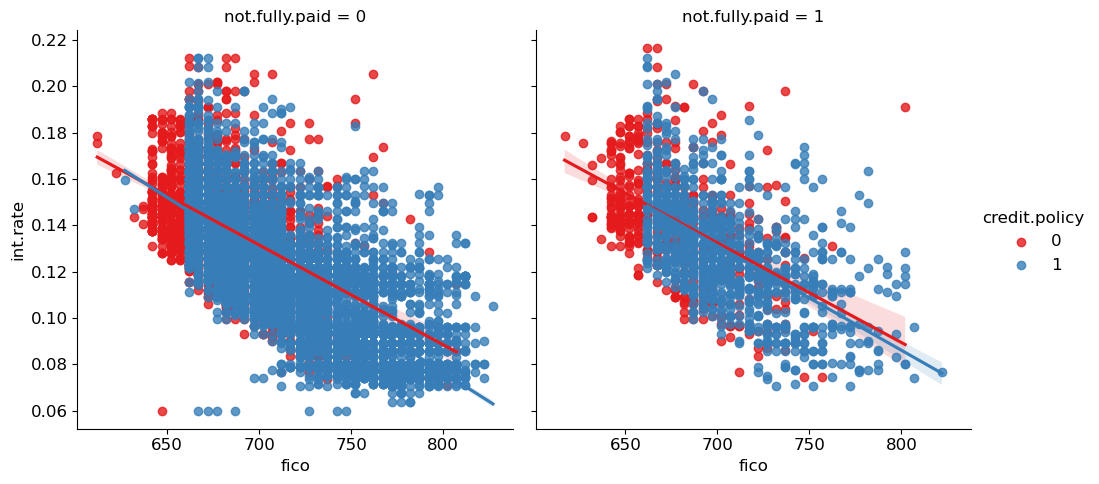

In [75]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan_df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.show()

## Categorical Features

In [76]:
cat_feats = ['purpose']

In [77]:
final_data = pd.get_dummies(loan_df,columns=cat_feats,drop_first=True)

In [78]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training a Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [84]:
predictions = dtree.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



In [87]:
print(confusion_matrix(y_test,predictions))

[[2000  408]
 [ 369   97]]


## Training the Random Forest model

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier(n_estimators=600)

In [90]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

### Predictions and Evaluation

In [91]:
predictions = rfc.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.40      0.01      0.02       466

    accuracy                           0.84      2874
   macro avg       0.62      0.50      0.47      2874
weighted avg       0.77      0.84      0.77      2874



In [94]:
print(confusion_matrix(y_test,predictions))

[[2399    9]
 [ 460    6]]
